In [1]:
import pandas as pd
import numpy as np

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

import sys
import warnings

warnings.filterwarnings('ignore')

In [2]:
sys.path.insert(1, "../scripts")
from ml_processors import ML_Processor as MLP
from models import ML_Models

mlp = MLP()
mlm = ML_Models()

In [3]:
fb_data =  pd.read_csv('../data/facebook_data.csv')
ch_data =  pd.read_csv('../data/chrome_data.csv')
cm_data =  pd.read_csv('../data/chrome_mobile_webview_data.csv')
pt5_data =  pd.read_csv('../data/platform_5.csv')
pt6_data =  pd.read_csv('../data/platform_6.csv')

In [4]:
columns_to_be_dropped = ['no','SAID_YES']
fb_data_clean = fb_data.drop(columns_to_be_dropped,axis=1)
ch_data_clean = ch_data.drop(columns_to_be_dropped,axis=1)  
cm_data_clean = cm_data.drop(columns_to_be_dropped,axis=1)  

In [5]:

# separating categorical and numerical variables

cat2, num2 = mlp.sep_cat_num(fb_data_clean)
cat3, num3 = mlp.sep_cat_num(ch_data_clean)
cat4, num4 = mlp.sep_cat_num(cm_data_clean)
cat5, num5 = mlp.sep_cat_num(pt5_data)
cat6, num6 = mlp.sep_cat_num(pt6_data)

In [6]:
fb_data_clean[cat2].describe()

,auction_id,experiment,date,device_make,browser
count,156,156,156,156,156
unique,156,2,8,63,1
top,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-03,Samsung SM-G960F,Facebook
freq,1,112,47,16,156


In [8]:
pipe_1 = Pipeline(
    steps=[
        ("label categories", FunctionTransformer(mlp.cat_labeler, kw_args={"cat_cols": cat2})),
        ("scale data", FunctionTransformer(mlp.scaler)),
        ("separate target and features", FunctionTransformer(mlp.target_feature, kw_args={"f_r": [0, 5], "t":-1})),
        ("divide dataset", FunctionTransformer(mlp.set_splitter, kw_args={"test": 0.1, "val":0.2, "rand_state":8})),      
        ])
sets = pipe_1.fit_transform(fb_data_clean)


catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [9]:
sets2 = pipe_1.fit_transform(ch_data_clean)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [10]:

sets3 = pipe_1.fit_transform(cm_data_clean)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [11]:

sets4 = pipe_1.fit_transform(pt5_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [12]:

sets5 = pipe_1.fit_transform(pt6_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [14]:
# generate model

model = mlm.xgb_model(sets[0], sets[1], sets[2], sets[3])
model2 = mlm.xgb_model(sets2[0], sets2[1], sets2[2], sets2[3])
model3 = mlm.xgb_model(sets3[0], sets3[1], sets3[2], sets3[3])



In [15]:

# Then predict results from X_test data


def evaluate_model(model, df, x_test, y_test):
    pred_xgb = model.predict(x_test)
    accuracy = accuracy_score(pred_xgb, y_test)
    print("The model accuracy is: ", accuracy)
    print("the loss function is: ", model.objective)

    sorted_idx = model.feature_importances_.argsort()
    columns = np.array(df.columns.to_list()[:5])
    plt.barh(columns[sorted_idx], model.feature_importances_[sorted_idx])
    plt.xlabel("Xgboost Feature Importance")

The model accuracy is:  0.625
the loss function is:  binary:logistic


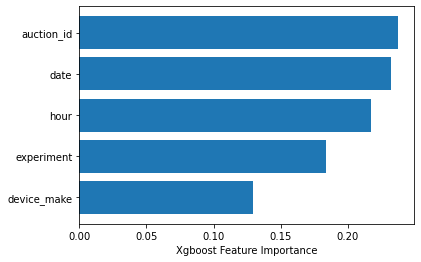

In [16]:
evaluate_model(model, fb_data_clean, sets[2], sets[3])

The model accuracy is:  0.4714285714285714
the loss function is:  binary:logistic


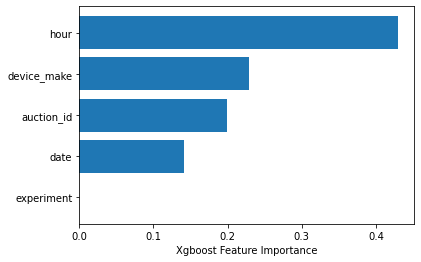

In [17]:
evaluate_model(model2, ch_data_clean, sets2[2], sets2[3])

The model accuracy is:  0.5652173913043478
the loss function is:  binary:logistic


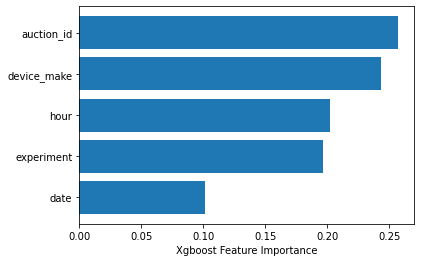

In [18]:
evaluate_model(model3, cm_data_clean, sets3[2], sets3[3])

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()
    
correlation_heatmap(pd.DataFrame(sets[0]))